

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


### get url

In [29]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-dd-mm'
startdate = "'2016-05-12'"
url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/rme2-xgvs.csv?$where=opened>='2016-05-12'


In [30]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Set Display Column with wider so no problem with Media URL series

In [32]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [33]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [34]:
df = pd.read_csv(url)

In [35]:
df.shape

(1000, 16)

#### wow, 5 days > 1000 reports

In [36]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6606742,12/08/2016 12:58:47 AM,NaN,12/08/2016 01:21:23 AM,Open,Open,PUC - Water - Graffiti Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Fire_hydrant - Not_Offensive,Intersection of PINE ST and STOCKTON ST,3.0,Nob Hill,"(37.7912981240787, -122.407322888067)",Open311,NaN
1,6606673,12/07/2016 10:53:54 PM,NaN,12/07/2016 11:24:49 PM,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,Intersection of BRODERICK ST and FULTON ST,5.0,Western Addition,"(37.7766439946699, -122.439844187879)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584903753da19793c74c3848/report.jpg
2,6606441,12/07/2016 07:41:29 PM,NaN,12/07/2016 08:22:37 PM,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,"1594 LA PLAYA, SAN FRANCISCO, CA, 94122",4.0,Outer Sunset,"(37.756714805968, -122.508730604706)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5839d3633da18eff3daa3174/report.jpg


In [37]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [38]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6606742,2016-12-08 00:58:47,NaT,2016-12-08 01:21:23,Open,Open,PUC - Water - Graffiti Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Fire_hydrant - Not_Offensive,Intersection of PINE ST and STOCKTON ST,3.0,Nob Hill,"(37.7912981240787, -122.407322888067)",Open311,NaN
1,6606673,2016-12-07 22:53:54,NaT,2016-12-07 23:24:49,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,Intersection of BRODERICK ST and FULTON ST,5.0,Western Addition,"(37.7766439946699, -122.439844187879)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584903753da19793c74c3848/report.jpg
2,6606441,2016-12-07 19:41:29,NaT,2016-12-07 20:22:37,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,"1594 LA PLAYA, SAN FRANCISCO, CA, 94122",4.0,Outer Sunset,"(37.756714805968, -122.508730604706)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5839d3633da18eff3daa3174/report.jpg


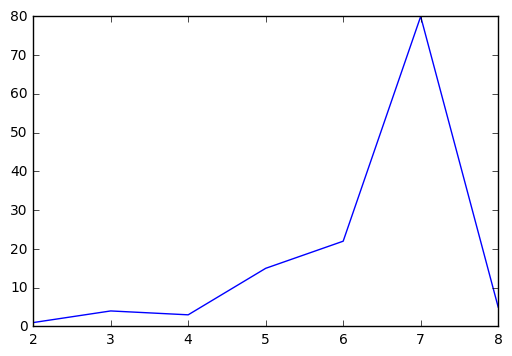

In [39]:
df.Closed.dt.day.value_counts().sort_index().plot()

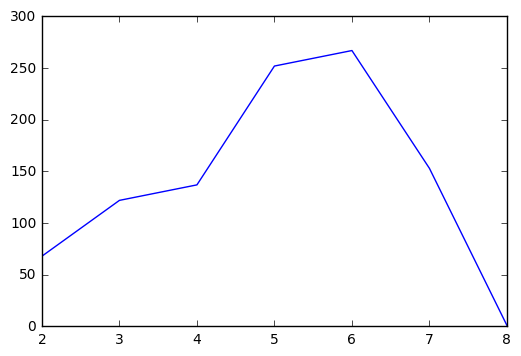

In [40]:
df.Opened.dt.day.value_counts().sort_index().plot()

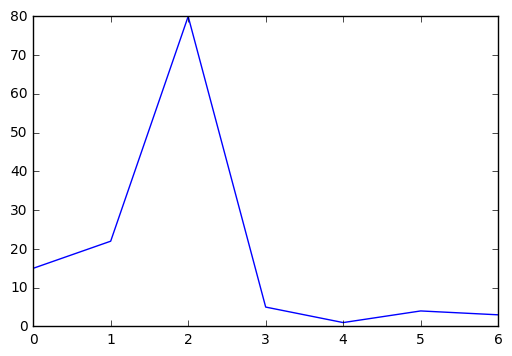

In [41]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [42]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [43]:

df['Request Details'].value_counts()


Other_enter_additional_details_below - Offensive    156
Building_commercial - Not_Offensive                 114
Pole - Not_Offensive                                 66
Mail_box - Not_Offensive                             61
Transit_Shelter_Platform - Not_Offensive             58
Signal_box - Not_Offensive                           58
Sidewalk_in_front_of_property - Offensive            43
Sidewalk_in_front_of_property - Not_Offensive        41
Building_other - Not_Offensive                       39
Parking_meter - Not_Offensive                        34
Building_commercial - Offensive                      31
Pole - Offensive                                     29
Signal_box - Offensive                               28
Building_residential - Not_Offensive                 27
Mail_box - Offensive                                 24
Sign - Not_Offensive                                 22
News_rack - Not_Offensive                            21
Fire_hydrant - Not_Offensive                    

In [44]:
df['Supervisor District'].value_counts().sort_index()



1.0      50
2.0      46
3.0      90
4.0       6
5.0     125
6.0     102
7.0      27
8.0     197
9.0     149
10.0     94
11.0    111
Name: Supervisor District, dtype: int64

In [45]:
df.Neighborhood.value_counts()

Mission                         129
Mission Dolores                  67
South of Market                  53
Cayuga                           48
Potrero Hill                     46
Chinatown                        37
Duboce Triangle                  32
Civic Center                     27
Inner Richmond                   25
Glen Park                        24
Buena Vista                      23
Tenderloin                       23
Mission Terrace                  21
Crocker Amazon                   18
Dolores Heights                  18
Excelsior                        16
Bayview                          16
Lone Mountain                    14
Castro                           14
Nob Hill                         13
North Beach                      13
Panhandle                        13
Alamo Square                     12
Western Addition                 12
Lower Nob Hill                   11
Portola                          11
Sunnyside                        10
Lower Haight                

In [46]:
df[df.Neighborhood == 'Mission'].head(8)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
21,6605496,2016-12-07 14:38:29,NaT,2016-12-07 14:49:39,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"2246 MISSION ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.761061038647, -122.419445617105)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58488f5c3da19793c74c3174/photo_20161207_143755.jpg
27,6605159,2016-12-07 13:14:17,NaT,2016-12-07 13:14:17,Open,new,US Postal Service Maintenance Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Mail_box - Offensive,Intersection of 20TH ST and SHOTWELL ST,9.0,Mission,"(37.7588301350928, -122.415779178203)",Integrated Agency,NaN
65,6604590,2016-12-07 11:27:58,NaT,2016-12-07 11:43:29,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_commercial - Offensive,"2708 24TH ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.753060054585, -122.406546817556)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584862b23da19793c74c2a56/photo_20161207_112720.jpg
92,6604321,2016-12-07 10:27:38,NaT,2016-12-07 10:27:38,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Fire_Police_Callbox - Offensive,Intersection of 16TH ST and HOFF ST,9.0,Mission,"(37.7649962937143, -122.420580771806)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5848548c3da19793c74c255d/report.jpg
100,6604235,2016-12-07 10:14:23,NaT,2016-12-07 10:43:23,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,"3460 18TH ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.761886601183, -122.420707589485)",Voice In,http://mobile311.sfgov.org/media/san_francisco/report/photos/584838513da19793c74c1e02/photo_20161207_082629.jpg
109,6603859,2016-12-07 09:10:26,NaT,2016-12-07 09:56:45,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,"2800 23RD ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.754545697076, -122.408494419004)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584842743da19793c74c2196/photo_20161207_090934.jpg
110,6603828,2016-12-07 09:07:12,NaT,2016-12-07 09:41:13,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,"2818 23RD ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.75454177923, -122.408698054269)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584841b23da19793c74c2155/photo_20161207_090647.jpg
111,6603814,2016-12-07 09:03:37,NaT,2016-12-07 09:41:07,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_residential - Not_Offensive,"2823 23RD ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.754298083772, -122.408950648914)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584840da3da19793c74c212e/photo_20161207_090323.jpg



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [47]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']


In [48]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:3])


0    http://mobile311.sfgov.org/media/san_francisco/report/photos/584903753da19793c74c3848/report.jpg
1    http://mobile311.sfgov.org/media/san_francisco/report/photos/5839d3633da18eff3daa3174/report.jpg
2    http://mobile311.sfgov.org/media/san_francisco/report/photos/584746153da19793c74c0afb/report.jpg
Name: Media URL, dtype: object


In [49]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/584903753da19793c74c3848/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/584903753da19793c74c3848/report.jpg


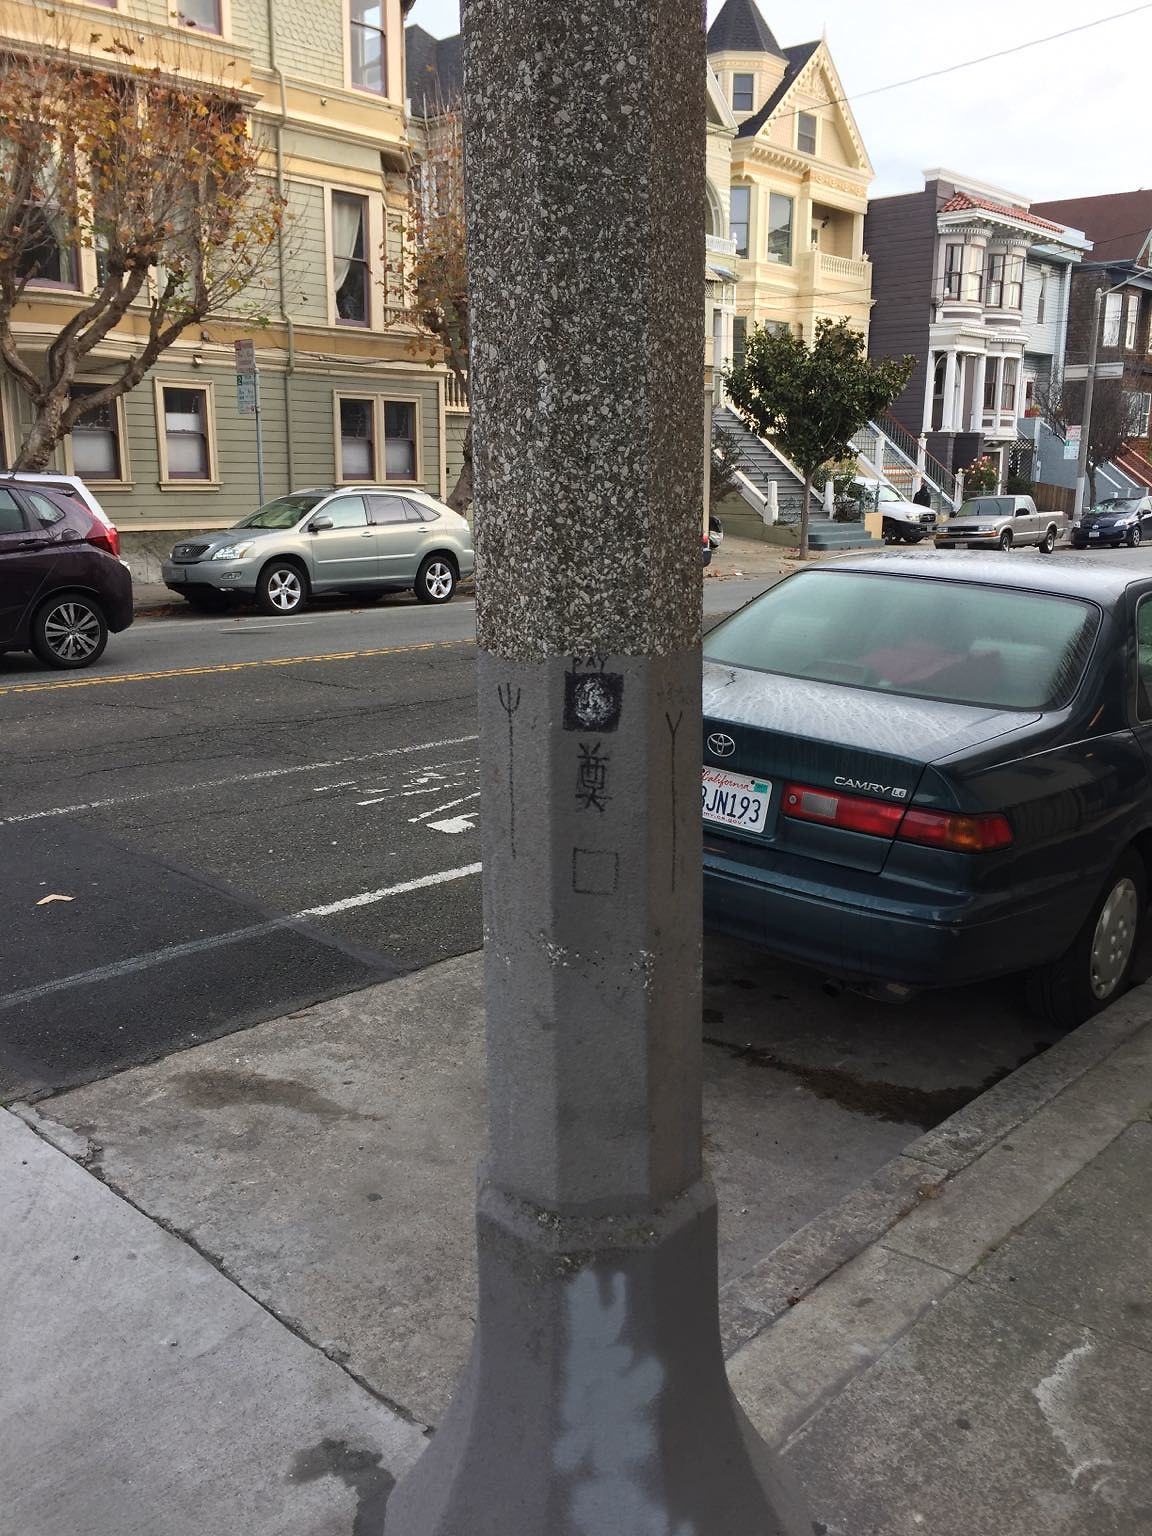

In [51]:
print(images[0])
Image(images[0])


In [52]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


In [53]:
images[:80].to_csv("./imagelist.txt", index=False)

In [54]:

%cd assets/
!wget -i ../imagelist.txt

!sleep 30
#%ls | gawk 'BEGIN{ a=1 }{ printf "mv \"%s\" %04d.jpg\n", $0, a++ }' | bash
#!sleep 10
#!convert -delay 50 *.jpg out.mp4
%cd ..


/home/gdillon/JupyterPractice/graffiti_SF311/assets
--2016-12-09 12:24:39--  http://mobile311.sfgov.org/media/san_francisco/report/photos/584903753da19793c74c3848/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322478 (315K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 314.92K  1.31MB/s    in 0.2s    

2016-12-09 12:24:39 (1.31 MB/s) - 'report.jpg' saved [322478/322478]

--2016-12-09 12:24:39--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5839d3633da18eff3daa3174/report.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 122845 (120K) [image/jpeg]
Saving to: 'report.jpg.1'

report.jpg.1        100%[===================>] 119.97K  --.-KB/s    in 0.001s  

2016-12-09 12:24:39 (149 MB/s) - 'report.j

In [26]:
#!convert -delay 50 *.jpg out.mp4


In [27]:
!ls


San+Fran +Graffiti pull one day.ipynb	 assets		pipevid.sh
San+Francisco+Graffiti with Video.ipynb  imagelist.txt


In [28]:
Image('report2.jpg')